In [20]:
import pandas as pd

In [21]:
df_customers = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/raw/customers.csv", sep=",")
df_transactions = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/raw/transactions.csv", sep=",")
df_products = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/raw/products.csv", sep=",")

NETTOYAGE DF CUSTOMERS

In [22]:
df_customers.shape #(8623, 3)
df_customers.columns # Index(['client_id', 'sex', 'birth'], dtype='object')
df_customers.describe() # pas d'incohérences dans les valeurs

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [23]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


<Axes: ylabel='sex'>

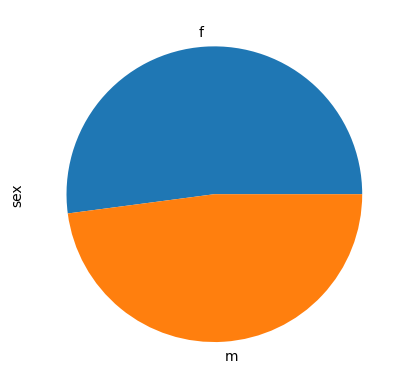

In [24]:
df_customers['sex'].value_counts().plot.pie()

In [25]:
# pas d'incohérences dans les valeurs (cf describe)
# Verif valeurs manquantes 
df_customers.isna().sum() # pas de valeurs manquantes

client_id    0
sex          0
birth        0
dtype: int64

In [26]:
df_customers.dtypes #pas de standardisation a effectuer pour cette table 

client_id    object
sex          object
birth         int64
dtype: object

In [45]:
#retrait des doublons 
df_customers.drop_duplicates() # pas de doublons 

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


NETTOYAGE DE DF TRANSACTION

In [27]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [28]:
df_transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [29]:
df_transactions.shape # (679532, 4)
df_transactions.columns # Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')
df_transactions.describe() # un point à faire avec les dates 

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [30]:
df_transactions.isna().sum() # pas de valeurs manquantes mais format date KO 

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [31]:
''' J'ai essayé de transformer la colonne date en datetime mais VS Code affiche des erreurs'''
# essai transformation colonne en datetime
# df_transactions['date'] = pd.to_datetime(df_transactions['date']) 
# affiche des incohérences
# Voici le message de VS Code : ParserError: Unknown string format: 
# test_2021-03-01 02:30:02.237419 present at position 3019


" J'ai essayé de transformer la colonne date en datetime mais VS Code affiche des erreurs"

In [44]:
# donc on va chercher les lignes test et les supprimer
KO_dates = df_transactions[pd.to_datetime(df_transactions['date'], errors='coerce').isna()]

# supprimer les lignes test
df_transactions_clean = df_transactions.drop(KO_dates.index)

# convertir la colonne en datetime
df_transactions_clean['date'] = pd.to_datetime(df_transactions_clean['date'])

# normaliser les dates pour supprimer les heures
df_transactions_clean['date'] = df_transactions_clean['date'].dt.normalize()

# afficher le df final avec la colonne convertie sans les heures
df_transactions_clean.shape # (679332, 4)
df_transactions_clean.head()


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20,s_211425,c_103
1,1_251,2022-02-02,s_158752,c_8534
2,0_1277,2022-06-18,s_225667,c_6714
3,2_209,2021-06-24,s_52962,c_6941
4,0_1509,2023-01-11,s_325227,c_4232


In [42]:
#retrait des doublons 
df_transactions_clean.drop_duplicates() # presque 800 lignes de retirées

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20,s_211425,c_103
1,1_251,2022-02-02,s_158752,c_8534
2,0_1277,2022-06-18,s_225667,c_6714
3,2_209,2021-06-24,s_52962,c_6941
4,0_1509,2023-01-11,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489
679528,1_639,2022-03-19,s_181434,c_4370
679529,0_1425,2022-12-20,s_314704,c_304
679530,0_1994,2021-07-16,s_63204,c_2227


NETTOYAGE DF PRODUCTS

In [33]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [34]:
df_products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [38]:
df_products.shape # (3287, 3)
df_products.columns # Index(['id_prod', 'price', 'categ'], dtype='object')
df_products.describe() # des valeurs négatives en prix ???

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [47]:
# on va voir de plus près les valeurs négatives 
df_products.loc[df_products['price'] < 0]

,id_prod,price,categ
731,T_0,-1.0,0


In [50]:
#il n'y en a qu'une qui semble etre un test, je la retire 
df_products = df_products.loc[df_products['price'] >= 0]

In [51]:
df_products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


<Axes: ylabel='categ'>

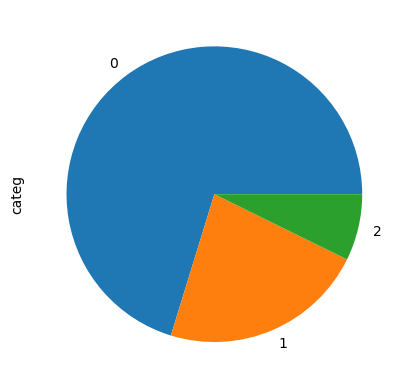

In [40]:
df_products['categ'].value_counts().plot.pie()

In [41]:
# Les doublons que j'avais oublié
df_products.drop_duplicates()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [61]:
# vérifier la cohérence des données entres elles 

# Filtrer les lignes où id_prod commence par "0"
starts_with_0 = df_products['id_prod'].str.startswith('0')
starts_with_1 = df_products['id_prod'].str.startswith('1')
starts_with_2 = df_products['id_prod'].str.startswith('2')

# Compter le nombre de lignes qui commencent par "0"
count_starts_with_0 = starts_with_0.sum()
count_starts_with_1 = starts_with_1.sum()
count_starts_with_2 = starts_with_2.sum()

# Afficher le resultat 
print(count_starts_with_0)
print(count_starts_with_1)
print(count_starts_with_2)

2308
739
239
